In [63]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [64]:
#Loading data
df=pd.read_csv('Variant I.csv')

In [65]:
#Displaying top 5 rows
df.head(5)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.6,0.252681,-1,188,20,0.021614,-0.266603,AC,2596,...,0,1000.0,1,INTERNET,7.634858,linux,0,1,0,5
1,0,0.9,0.185206,-1,51,30,0.001696,-1.191015,AD,898,...,0,1500.0,0,INTERNET,5.408299,other,0,1,0,4
2,0,0.1,0.505509,-1,187,20,0.011880,-1.252679,AB,2851,...,0,500.0,0,INTERNET,9.401087,linux,1,1,0,5
3,0,0.2,0.612030,-1,55,20,0.001582,-3.001035,AA,4035,...,0,200.0,0,INTERNET,4.165579,linux,0,1,0,1
4,0,0.4,0.592596,319,68,30,0.011189,-0.729188,AB,1611,...,0,200.0,1,INTERNET,8.971943,linux,0,1,0,5


In [66]:
#Displaying the datatypes and the non null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [67]:
dffraud=df[df['fraud_bool']==1]

In [68]:
dffraud.groupby('zip_count_4w').count()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,velocity_6h,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
zip_count_4w,,,,,,,,,,,,,,,,,,,,,
18,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
31,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
35,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
36,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
39,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6103,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6250,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6251,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [69]:
#No of columns
len(df.columns)

32

C:\Users\tejas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='source', ylabel='count'>

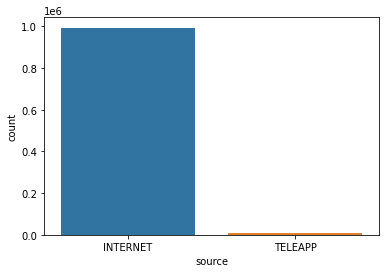

In [70]:
#Ploting fraud from source
sns.countplot(df['source'])

In [71]:
#fraud percentage from all the applications
(len(df[df['fraud_bool']==1])/len(df))*100

1.1029

In [72]:
#Non fraud application
(len(df[df['fraud_bool']==0])/len(df))*100

98.89710000000001

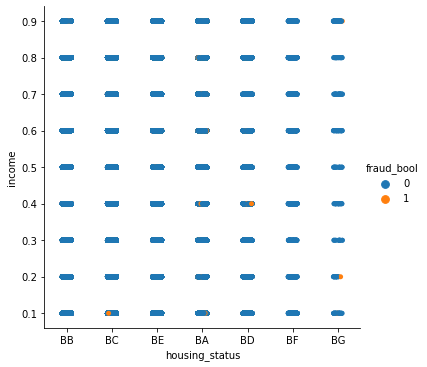

In [73]:
# Making categorical plot with income and the housing status
sns.catplot(data=df, x="housing_status", y="income", hue="fraud_bool")
plt.show()

<AxesSubplot:>

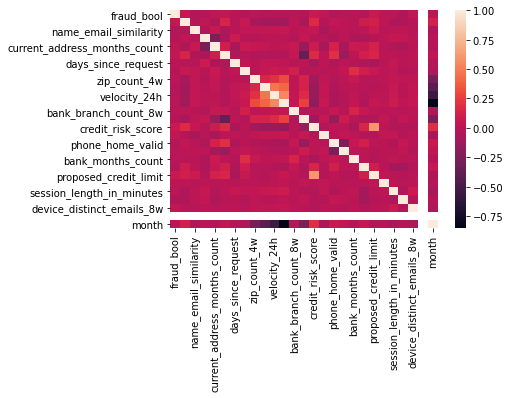

In [74]:
#Making heatmap of the correlation among the columns
sns.heatmap(df.corr())

In [75]:
#Selecting the numerical datatype
numericDF=df.select_dtypes(include = 'number').columns

In [76]:
#Selecting the categorical datatype
categoricalDF=df.select_dtypes(exclude = 'number').columns

In [77]:
categoricalDF

Index(['payment_type', 'employment_status', 'housing_status', 'source',
       'device_os'],
      dtype='object')

In [78]:
len(categoricalDF)

5

In [79]:
len(numericDF)

27

<AxesSubplot:xlabel='bank_branch_count_8w', ylabel='current_address_months_count'>

C:\Users\tejas\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


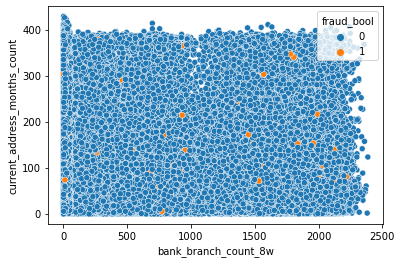

In [80]:
sns.scatterplot(data=df,x="bank_branch_count_8w",y="current_address_months_count",hue='fraud_bool' )

<AxesSubplot:xlabel='name_email_similarity', ylabel='current_address_months_count'>

C:\Users\tejas\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


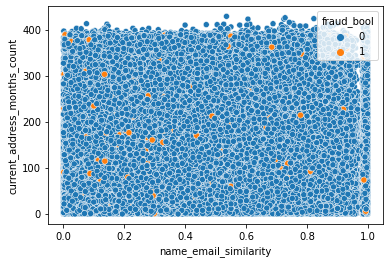

In [81]:

sns.scatterplot(data=df,x="name_email_similarity",y="current_address_months_count",hue='fraud_bool' )

In [82]:
# Model
dfModel=df[numericDF]

# One Hot Encoding

In [1]:


one_hot_encoded_data = pd.get_dummies(df, columns = ['payment_type', 'employment_status', 'housing_status', 'source',
       'device_os'])


In [84]:
dfModel=pd.DataFrame(one_hot_encoded_data)

In [85]:
dfModel

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0,0.6,0.252681,-1,188,20,0.021614,-0.266603,2596,11237.202503,...,0,0,0,1,0,1,0,0,0,0
1,0,0.9,0.185206,-1,51,30,0.001696,-1.191015,898,6811.421858,...,0,0,0,1,0,0,0,1,0,0
2,0,0.1,0.505509,-1,187,20,0.011880,-1.252679,2851,8425.498770,...,1,0,0,1,0,1,0,0,0,0
3,0,0.2,0.612030,-1,55,20,0.001582,-3.001035,4035,8513.696191,...,1,0,0,1,0,1,0,0,0,0
4,0,0.4,0.592596,319,68,30,0.011189,-0.729188,1611,4226.142238,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.1,0.237534,30,42,20,0.008898,-1.188112,636,9998.252045,...,0,0,0,1,0,0,0,1,0,0
999996,0,0.6,0.917942,-1,242,20,0.020913,-1.518733,1264,3775.425260,...,0,0,0,1,0,0,0,1,0,0
999997,0,0.1,0.861117,91,5,30,17.555226,-1.074359,1490,6234.383821,...,0,0,0,1,0,0,0,1,0,0
999998,0,0.6,0.933076,-1,367,40,0.001743,-0.541853,1269,4244.460112,...,0,0,0,1,0,0,0,1,0,0


In [86]:
importantFeature=dfModel.columns

# Without Over Sampling

In [87]:
y=dfModel['fraud_bool']
X=dfModel.drop(columns=['fraud_bool'])
features = X.columns.values
# Normalization
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [88]:
# Spliting the data into test data and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=121)

# logistic regression

In [90]:
modelLP = LogisticRegression(max_iter=500)
result = modelLP.fit(X_train, y_train)

In [91]:
prediction_test = modelLP.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))
f1_score(y_test, prediction_test)

0.9891233333333334


0.006091989034419738

In [92]:
LRWeight=modelLP.coef_

In [93]:
main_featureLR=pd.DataFrame([importantFeature[1:],LRWeight[0]]).transpose()

In [94]:
main_featureLR.sort_values(by=[1], ascending=False).head(5)

,0,1
23,device_distinct_emails_8w,2.310545
13,credit_risk_score,1.260177
7,zip_count_4w,0.951165
38,housing_status_BA,0.892676
0,income,0.854298


# Gradient Boosting

In [95]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

clf.score(X_test, y_test)
clfprediction_test = clf.predict(X_test)
print (metrics.accuracy_score(y_test, clfprediction_test))
f1_score(y_test, clfprediction_test)

0.98923


0.06320672658741665

# oversample

In [98]:

oversample = SMOTE()
Xoversample, yoversample = oversample.fit_resample(X, y)

In [99]:
featuresoversample = X.columns.values
# Normalization
scaleroversample = MinMaxScaler(feature_range = (0,1))
scaleroversample.fit(X)
Xoversample = pd.DataFrame(scaleroversample.transform(Xoversample))
Xoversample.columns = featuresoversample

In [100]:

X_trainoversample, X_testoversample, y_trainoversample, y_testoversample = train_test_split(Xoversample, yoversample, test_size=0.3, random_state=121)

# Oversample Logistic Regression

In [102]:
modelLPoversample = LogisticRegression(max_iter=500)
modelLPoversample.fit(X_trainoversample, y_trainoversample)

LogisticRegression(max_iter=500)

In [103]:
prediction_testoversample = modelLPoversample.predict(X_testoversample)
print (metrics.accuracy_score(y_testoversample, prediction_testoversample))
f1_score(y_testoversample, prediction_testoversample)

0.7938734341900594


0.7938793394000674

In [104]:
LRWeighoversample=modelLPoversample.coef_
main_featureLRoversample=pd.DataFrame([importantFeature[1:],LRWeighoversample[0]]).transpose()
main_featureLRoversample.sort_values(by=[1], ascending=False).head(5)

,0,1
23,device_distinct_emails_8w,2.747102
13,credit_risk_score,1.756922
7,zip_count_4w,1.057683
0,income,1.037072
38,housing_status_BA,0.866345


# OverSampling Gradiant Boosting

In [105]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_trainoversample, y_trainoversample)

In [106]:
clf.score(X_testoversample, y_testoversample)
clfprediction_testoversample = clf.predict(X_testoversample)
print (metrics.accuracy_score(y_testoversample, clfprediction_testoversample))
f1_score(y_testoversample, clfprediction_testoversample)

0.9516046128722933


0.9512188907253549

In [107]:
clfFeature=clf.feature_importances_

In [108]:
#Important feautures
clf_feature=pd.DataFrame([importantFeature[1:],clfFeature]).transpose()
clf_feature.sort_values(by=[1], ascending=False).head(5)

,0,1
38,housing_status_BA,0.240274
4,customer_age,0.203828
50,device_os_windows,0.090858
15,phone_home_valid,0.075224
3,current_address_months_count,0.072761
